In [4]:
pip install scikit-learn pandas matplotlib seaborn 


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install sentence_transformers

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
pip install tf-keras

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.7 MB ? eta -:--:--
   ---------------------------------------- 1.7/1.7 MB 9.5 MB/s  0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from sentence_transformers import SentenceTransformer

# 1. The Dataset
corpus = [
    "Global warming is heating the planet",  # Semantically similar to query
    "The change in currency rates is global", # Keywords match, but different topic
    "I like eating apples and bananas"        # Completely irrelevant
]

# The Search Query
query = "climate change"

# Add query to corpus for visualization purposes later
all_text = corpus + [query]

print(f"Query: '{query}'")
print("Corpus Documents:")
for i, doc in enumerate(corpus):
    print(f"  Doc {i}: {doc}")


Query: 'climate change'
Corpus Documents:
  Doc 0: Global warming is heating the planet
  Doc 1: The change in currency rates is global
  Doc 2: I like eating apples and bananas


Bag of Words (BoW)

In [ ]:
print("\n--- 1. BAG OF WORDS (BoW) ---")

bow_vectorizer = CountVectorizer()

# Fit and Transform (Learn vocabulary and convert to vectors)
bow_matrix = bow_vectorizer.fit_transform(all_text)

# Convert to DataFrame for readability
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=bow_vectorizer.get_feature_names_out(), index=["Doc 0", "Doc 1", "Doc 2", "Query"])

print("BoW Vector Space (Note the zeros and integers):")
display(bow_df) # Use print(bow_df) if not in Jupyter

# Search: Compute Similarity between Query and Docs
# We use cosine similarity here to be consistent, though simple dot product is often used with BoW
bow_sims = cosine_similarity(bow_matrix[-1], bow_matrix[:-1])

print("\nBoW Search Results for 'climate change':")
for i, score in enumerate(bow_sims[0]):
    print(f"  Doc {i}: Score {score:.4f} -> '{corpus[i]}'")
    
# Observation: It likely found nothing significant or found Doc 1 purely due to the word 'change' if it was in the vocab.


--- 1. BAG OF WORDS (BoW) ---
BoW Vector Space (Note the zeros and integers):


,and,apples,bananas,change,climate,currency,eating,global,heating,in,is,like,planet,rates,the,warming
Doc 0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,1
Doc 1,0,0,0,1,0,1,0,1,0,1,1,0,0,1,1,0
Doc 2,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0
Query,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0



BoW Search Results for 'climate change':
  Doc 0: Score 0.0000 -> 'Global warming is heating the planet'
  Doc 1: Score 0.2673 -> 'The change in currency rates is global'
  Doc 2: Score 0.0000 -> 'I like eating apples and bananas'


Cell 3: Method 2 - TF-IDF


In [10]:
print("\n--- 2. TF-IDF ---")

# Initialize
tfidf_vectorizer = TfidfVectorizer()

# Fit and Transform
tfidf_matrix = tfidf_vectorizer.fit_transform(all_text)

# Convert to DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out(), index=["Doc 0", "Doc 1", "Doc 2", "Query"])

print("TF-IDF Vector Space (Note the decimals/weights):")
display(tfidf_df)

# Search
tfidf_sims = cosine_similarity(tfidf_matrix[-1], tfidf_matrix[:-1])

print("\nTF-IDF Search Results for 'climate change':")
for i, score in enumerate(tfidf_sims[0]):
    print(f"  Doc {i}: Score {score:.4f} -> '{corpus[i]}'")


--- 2. TF-IDF ---
TF-IDF Vector Space (Note the decimals/weights):


,and,apples,bananas,change,climate,currency,eating,global,heating,in,is,like,planet,rates,the,warming
Doc 0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.357455,0.453386,0.000000,0.357455,0.000000,0.453386,0.000000,0.357455,0.453386
Doc 1,0.000000,0.000000,0.000000,0.336597,0.000000,0.426931,0.000000,0.336597,0.000000,0.426931,0.336597,0.000000,0.000000,0.426931,0.336597,0.000000
Doc 2,0.447214,0.447214,0.447214,0.000000,0.000000,0.000000,0.447214,0.000000,0.000000,0.000000,0.000000,0.447214,0.000000,0.000000,0.000000,0.000000
Query,0.000000,0.000000,0.000000,0.619130,0.785288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000



TF-IDF Search Results for 'climate change':
  Doc 0: Score 0.0000 -> 'Global warming is heating the planet'
  Doc 1: Score 0.2084 -> 'The change in currency rates is global'
  Doc 2: Score 0.0000 -> 'I like eating apples and bananas'


Cell 4: Method 3 - Embeddings (The Semantic Search)


In [11]:
print("\n--- 3. WORD EMBEDDINGS (Sentence-BERT) ---")

# Load a pre-trained model (downloads a small model ~80MB)
model = SentenceTransformer('all-MiniLM-L6-v2')

# Encode: Convert text to dense vectors
embeddings = model.encode(all_text)

# Check the shape
print(f"Vector Shape: {embeddings.shape} (Rows, Dimensions)")
print("First 5 dimensions of Query Vector (Dense floats):")
print(embeddings[-1][:5]) 

# Search
embedding_sims = cosine_similarity([embeddings[-1]], embeddings[:-1])

print("\nEmbedding Search Results for 'climate change':")
for i, score in enumerate(embedding_sims[0]):
    print(f"  Doc {i}: Score {score:.4f} -> '{corpus[i]}'")
    
# Observation: Doc 0 should have the highest score, even though it shares NO words with the query!


--- 3. WORD EMBEDDINGS (Sentence-BERT) ---


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

c:\Users\boume\AppData\Local\Programs\Python\Python313\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\boume\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Vector Shape: (4, 384) (Rows, Dimensions)
First 5 dimensions of Query Vector (Dense floats):
[-0.05866583  0.09832545  0.11281896  0.07105912  0.06635301]

Embedding Search Results for 'climate change':
  Doc 0: Score 0.5776 -> 'Global warming is heating the planet'
  Doc 1: Score 0.3038 -> 'The change in currency rates is global'
  Doc 2: Score 0.0113 -> 'I like eating apples and bananas'


Cell 5: Visualizing the Vector Space


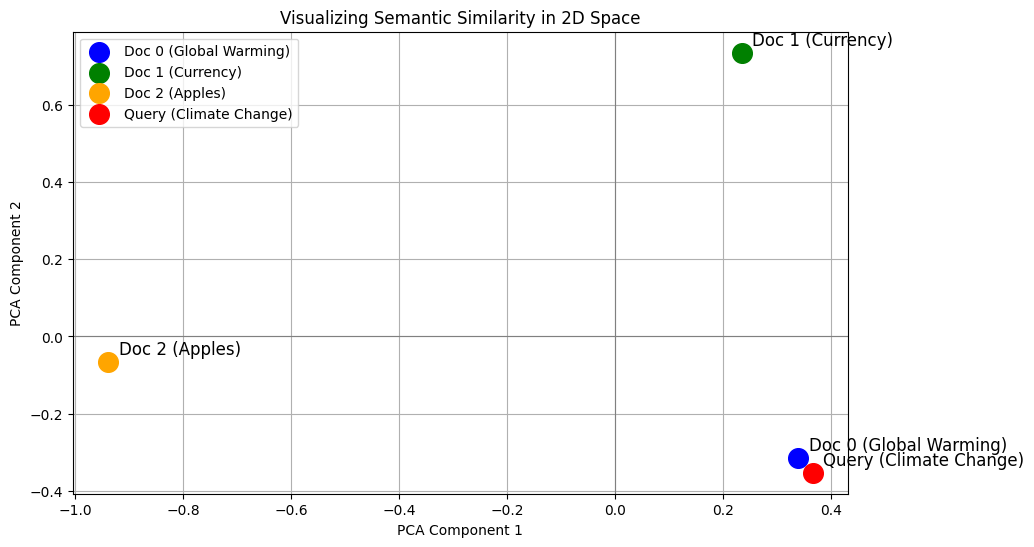

In [12]:
# Reduce dimensions from 384 (BERT default) to 2 using PCA
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(embeddings)

# Plotting
plt.figure(figsize=(10, 6))

# Define labels
labels = ["Doc 0 (Global Warming)", "Doc 1 (Currency)", "Doc 2 (Apples)", "Query (Climate Change)"]
colors = ['blue', 'green', 'orange', 'red']

# Plot points
for i, (x, y) in enumerate(reduced_vectors):
    plt.scatter(x, y, color=colors[i], s=200, label=labels[i])
    plt.text(x + 0.02, y + 0.02, labels[i], fontsize=12)

plt.title("Visualizing Semantic Similarity in 2D Space")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.axhline(0, color='grey', linewidth=0.8)
plt.axvline(0, color='grey', linewidth=0.8)
plt.legend()
plt.show()

In [13]:
pip install gensim

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



--- 4. WORD2VEC (Static Embeddings) ---
Vector Shape: (4, 10) (Rows, Dimensions)
Query Vector (Average of 'climate' + 'change'):
[-0.07455201  0.05320437  0.03550944 -0.02065957 -0.04990648  0.08292958
 -0.04683669  0.05904891 -0.01206115 -0.01274392]

Word2Vec Search Results for 'climate change':
  Doc 0: Score -0.2789 -> 'Global warming is heating the planet'
  Doc 1: Score 0.1672 -> 'The change in currency rates is global'
  Doc 2: Score -0.7525 -> 'I like eating apples and bananas'


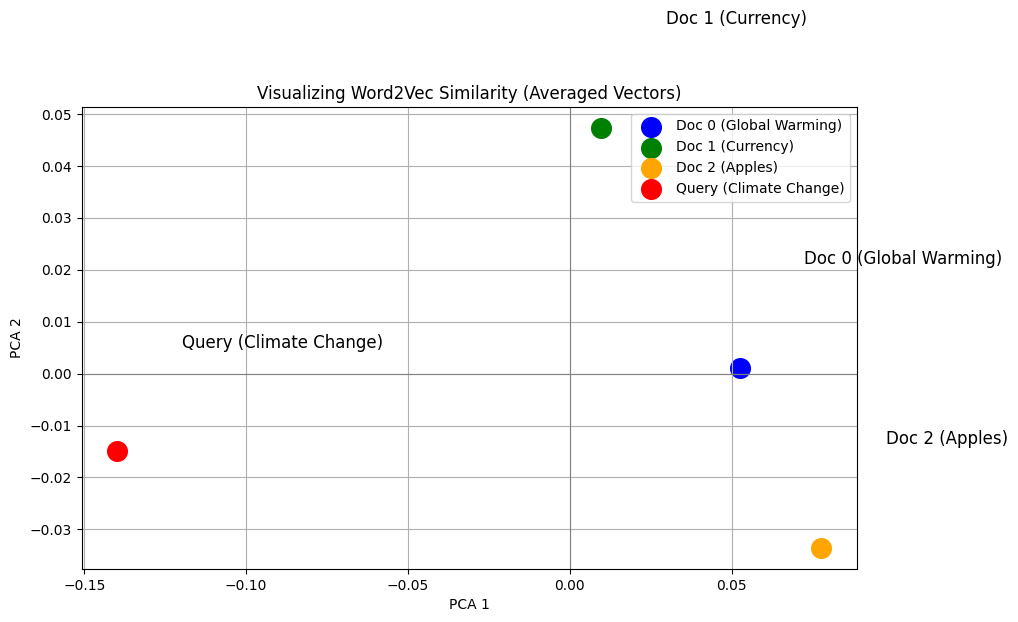

In [14]:
from gensim.models import Word2Vec
import numpy as np

print("\n--- 4. WORD2VEC (Static Embeddings) ---")

# 1. Preprocessing
# Word2Vec requires a list of tokenized sentences (list of lists)
tokenized_text = [sentence.lower().split() for sentence in all_text]

# 2. Train the Model
# Note: Usually you load a massive pre-trained model (like Google News). 
# We are training a tiny one here just to show you the data structure.
# vector_size=10 is small (usually 100-300) to make it easier to read.
w2v_model = Word2Vec(sentences=tokenized_text, vector_size=10, window=5, min_count=1, workers=4, seed=42)

# 3. Generate Sentence Vectors (The "Averaging" Strategy)
# Word2Vec gives us vectors for "climate" and "change", but not "climate change".
# We must Average them to represent the sentence.
def get_sentence_embedding(sentence, model):
    words = sentence.lower().split()
    # Get vectors for each word if it exists in the model
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    
    if not word_vectors:
        return np.zeros(model.vector_size)
    
    # Average them together (Mean pooling)
    return np.mean(word_vectors, axis=0)

# Apply to our corpus
w2v_embeddings = np.array([get_sentence_embedding(text, w2v_model) for text in all_text])

# 4. Search
w2v_sims = cosine_similarity([w2v_embeddings[-1]], w2v_embeddings[:-1])

print(f"Vector Shape: {w2v_embeddings.shape} (Rows, Dimensions)")
print("Query Vector (Average of 'climate' + 'change'):")
print(w2v_embeddings[-1]) 

print("\nWord2Vec Search Results for 'climate change':")
for i, score in enumerate(w2v_sims[0]):
    print(f"  Doc {i}: Score {score:.4f} -> '{corpus[i]}'")

# 5. Visualizing (Reuse your previous PCA plot code with new data)
pca = PCA(n_components=2)
w2v_reduced = pca.fit_transform(w2v_embeddings)

plt.figure(figsize=(10, 6))
labels = ["Doc 0 (Global Warming)", "Doc 1 (Currency)", "Doc 2 (Apples)", "Query (Climate Change)"]
colors = ['blue', 'green', 'orange', 'red']

for i, (x, y) in enumerate(w2v_reduced):
    plt.scatter(x, y, color=colors[i], s=200, label=labels[i])
    plt.text(x + 0.02, y + 0.02, labels[i], fontsize=12)

plt.title("Visualizing Word2Vec Similarity (Averaged Vectors)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.axhline(0, color='grey', linewidth=0.8)
plt.axvline(0, color='grey', linewidth=0.8)
plt.legend()
plt.show()